#Data Checks to perform
    #Check Missing values
    #Check Duplicates
    #Check data type
    #Check the number of unique values of each column
    #Check statistics of data set
    #Check various categories present in the different categorical column

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/flight_dataset.csv")

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 11)

In [6]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [7]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

dataset has no missing values

In [8]:
df.duplicated().sum()

0

dataset has no duplicate data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
categorical_data=[i for i in df.columns if df[i].dtype =="object" ]
print("categorical data :",categorical_data)
numerical_data=[i for i in df.columns if df[i].dtype!="object" ]
print("numerical data :",numerical_data)

categorical data : ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
numerical data : ['duration', 'days_left', 'price']


In [11]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [12]:
for i in categorical_data:
    print("categories in",i,"valriable: ",df[i].unique())

categories in airline valriable:  ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
categories in flight valriable:  ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
categories in source_city valriable:  ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
categories in departure_time valriable:  ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
categories in stops valriable:  ['zero' 'one' 'two_or_more']
categories in arrival_time valriable:  ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
categories in destination_city valriable:  ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
categories in class valriable:  ['Economy' 'Business']


In [13]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


(-1.25, 1.25, -1.25, 1.25)

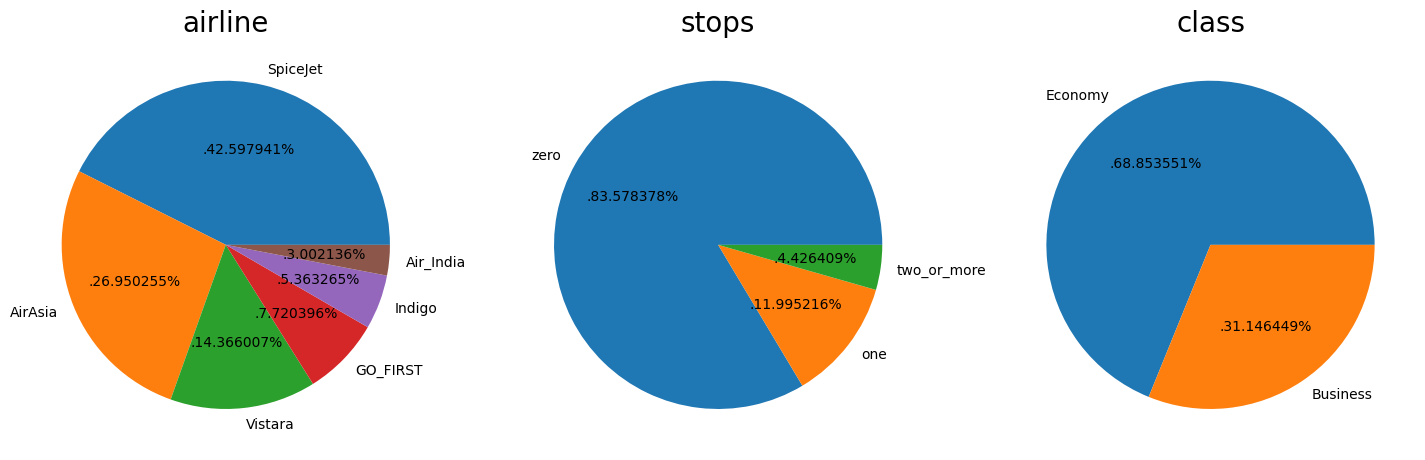

In [15]:
plt.rcParams['figure.figsize'] = (18, 9)

plt.subplot(1, 3, 1)
size = df['airline'].value_counts()
labels ='SpiceJet','AirAsia','Vistara','GO_FIRST','Indigo','Air_India'
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('airline', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 2)
size = df['stops'].value_counts()
labels ='zero','one','two_or_more'
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('stops', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 3)
size = df['class'].value_counts()
labels ='Economy','Business'
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('class', fontsize = 20)
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

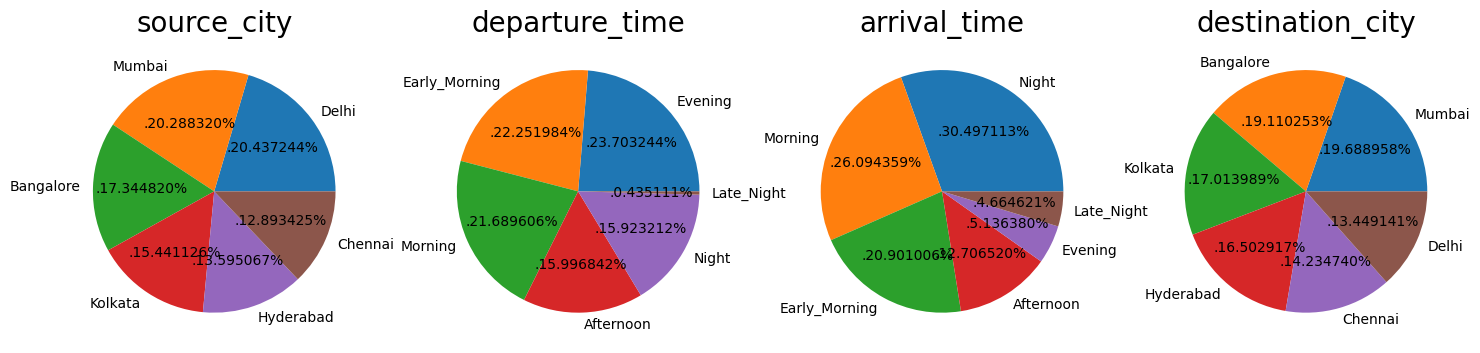

In [16]:
plt.subplot(1, 4, 1)
size = df['source_city'].value_counts()
labels ='Delhi','Mumbai','Bangalore','Kolkata','Hyderabad','Chennai'
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('source_city', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 2)
size = df['departure_time'].value_counts()
labels ='Evening','Early_Morning','Morning','Afternoon','Night','Late_Night'
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('departure_time', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 3)
size = df['arrival_time'].value_counts()
labels ='Night','Morning','Early_Morning','Afternoon','Evening','Late_Night'
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('arrival_time', fontsize = 20)
plt.axis('off')

plt.subplot(1, 4, 4)
size = df['destination_city'].value_counts()
labels ='Mumbai','Bangalore','Kolkata','Hyderabad','Chennai','Delhi'
plt.pie(size, labels = labels,autopct = '.%2f%%')
plt.title('destination_city', fontsize = 20)
plt.axis('off')

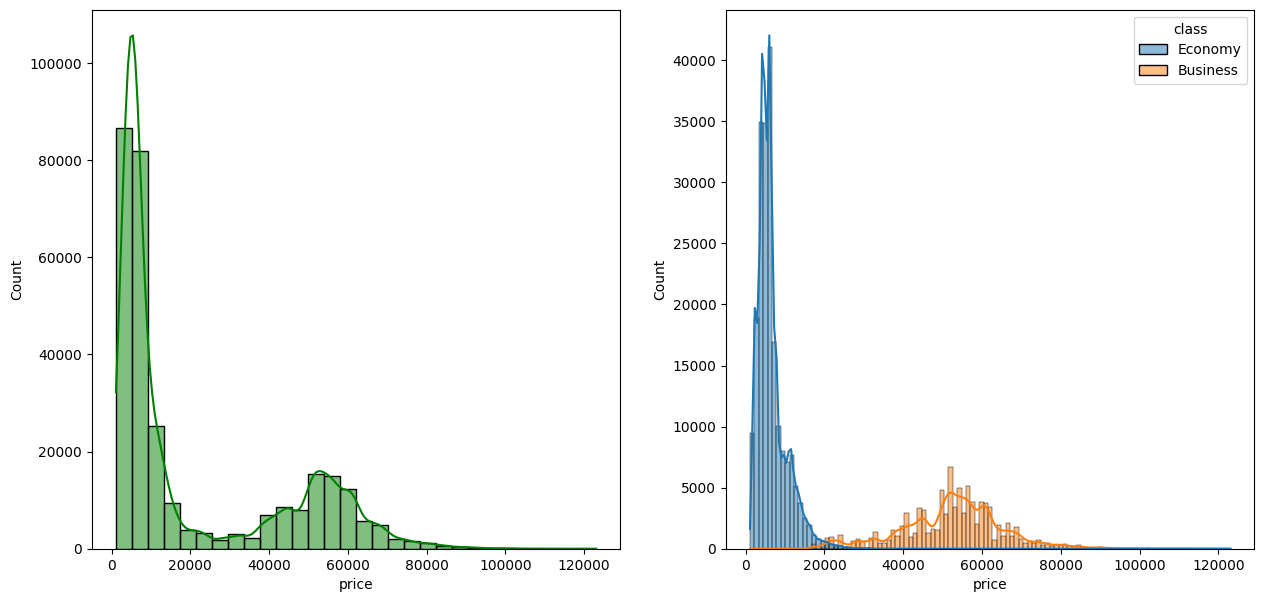

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="price",kde=True,hue='class')
plt.show()

figure 1 shows that maximum number of people have booked tickets with price less than 20000.

figure 2 shows that maximum number of  people have booked economy class tickets and business class tickets have price greater than 20000.

<Axes: xlabel='airline', ylabel='price'>

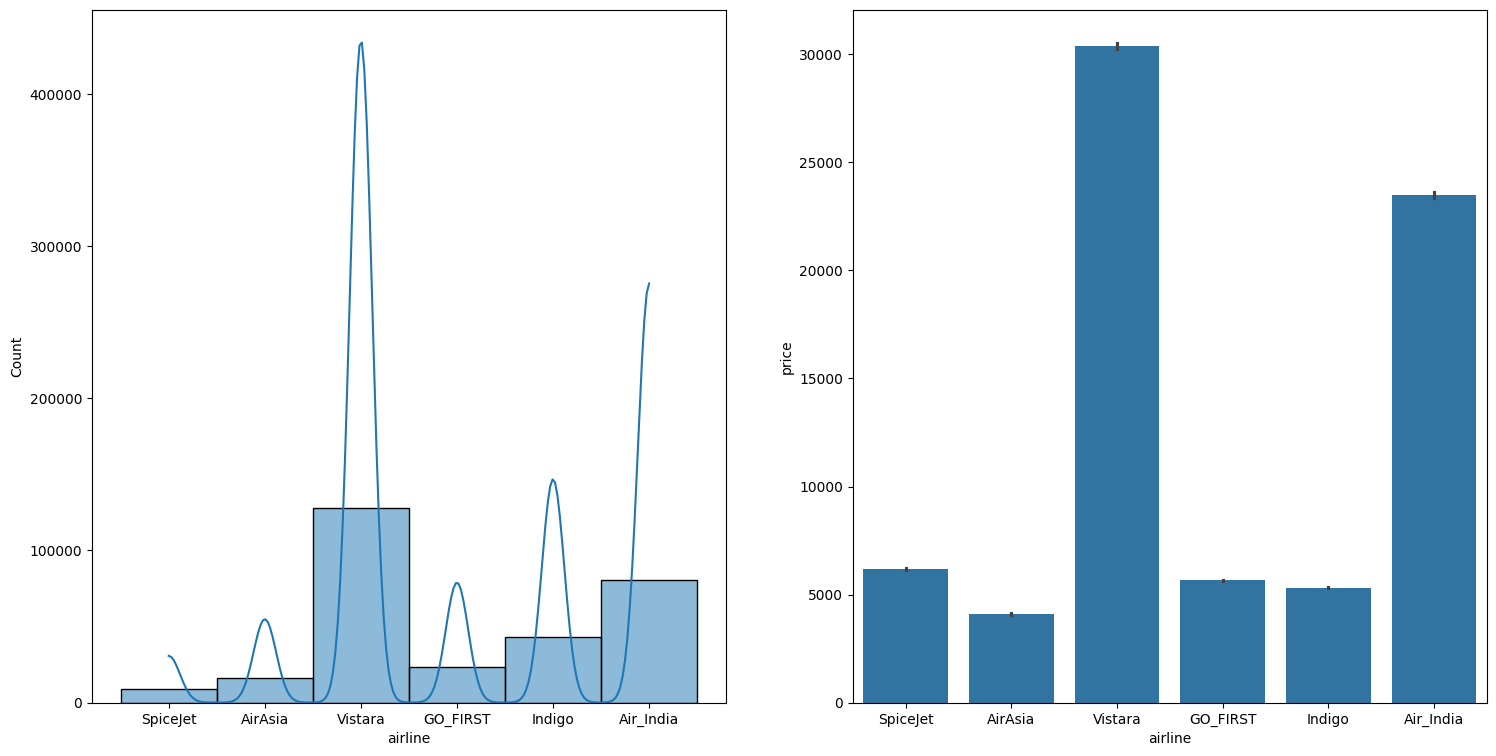

In [36]:
plt.subplot(1,2,1)
sns.histplot(data=df,x="airline",kde=True,bins=6)

plt.subplot(1,2,2)
sns.barplot(data=df,x="airline",y="price")

figure 1 shows that maximum flights as of vistara

figure 2 shows that vistara has highest price tickets.

<Axes: xlabel='stops', ylabel='price'>

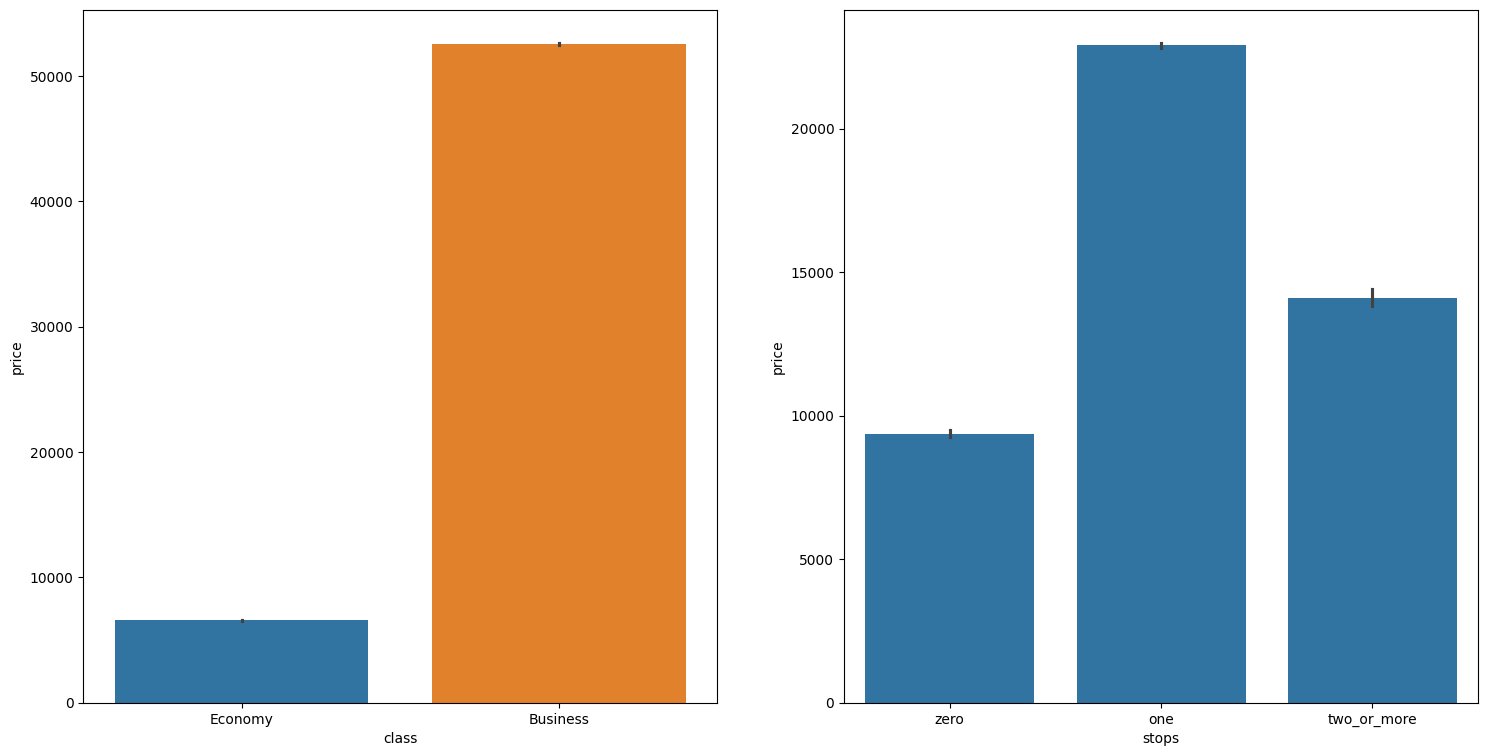

In [33]:
plt.subplot(1,2,1)
sns.barplot(data=df,x="class",y="price",hue="class") 

plt.subplot(1,2,2)
sns.barplot(df,x="stops",y="price")

fig 1 shows that business class tickets prices are higher than that of economy class.

fig 2 shows that flights with one stops have higher prices.

<Axes: xlabel='destination_city', ylabel='price'>

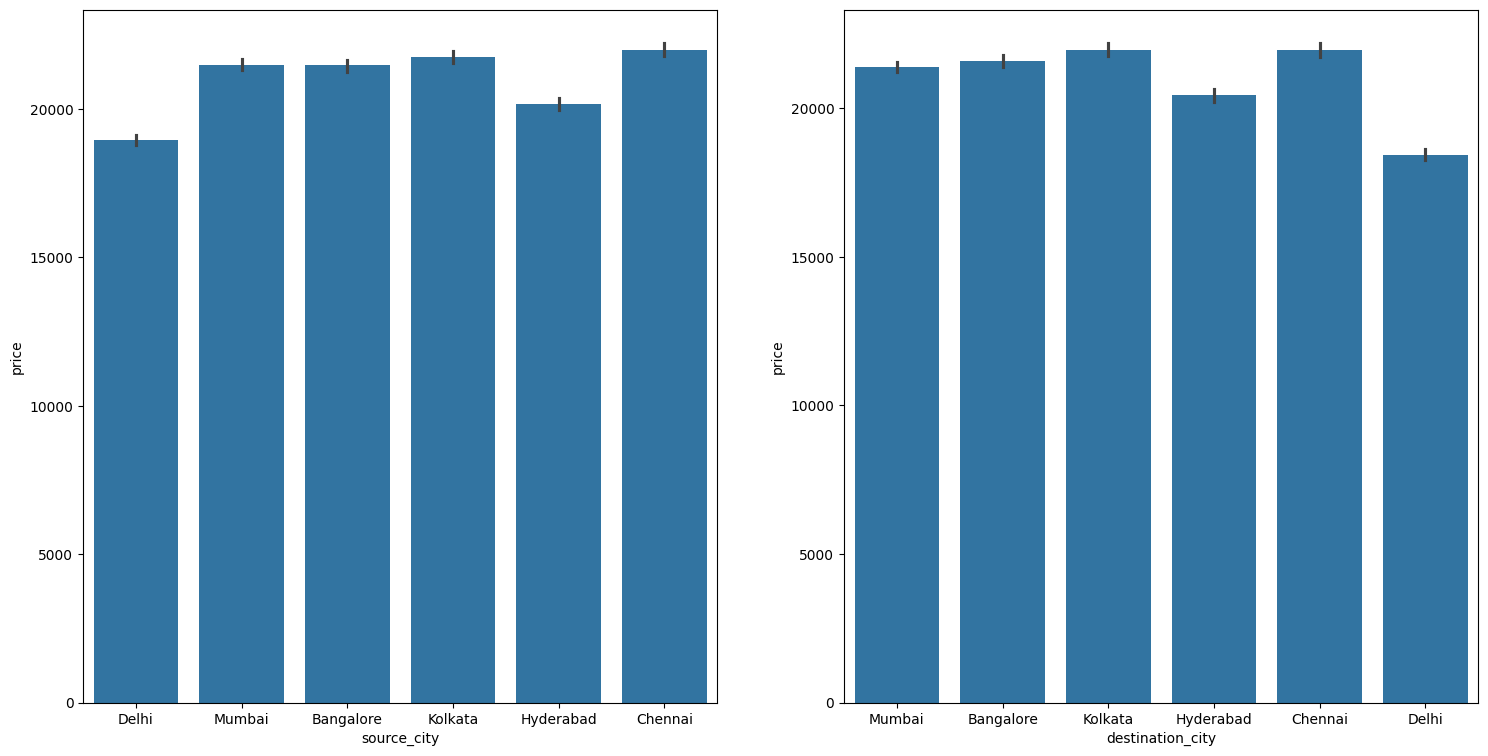

In [39]:
plt.subplot(1,2,1)
sns.barplot(df,x="source_city",y="price")

plt.subplot(1,2,2)
sns.barplot(df,x="destination_city",y="price")

In [47]:
df.iloc[:,8:11].corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [68]:
df.groupby('airline')['price'].mean().sort_values()

airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64

In [18]:
df=df.sample(n=2000)

In [159]:
from sklearn.preprocessing import OneHotEncoder
le = OneHotEncoder(handle_unknown='infrequent_if_exist')
train_categorical_data= le.fit_transform(x_train)
test_categorical_data= le.transform(x_test)
print(train_categorical_data.toarray().shape)
print(y_train.shape)
print(test_categorical_data.toarray().shape)
print(type(y_train))
print(type(train_categorical_data))

(60030, 1984)
(60030,)
(240123, 1984)
<class 'pandas.core.series.Series'>
<class 'scipy.sparse._csr.csr_matrix'>


<Axes: >

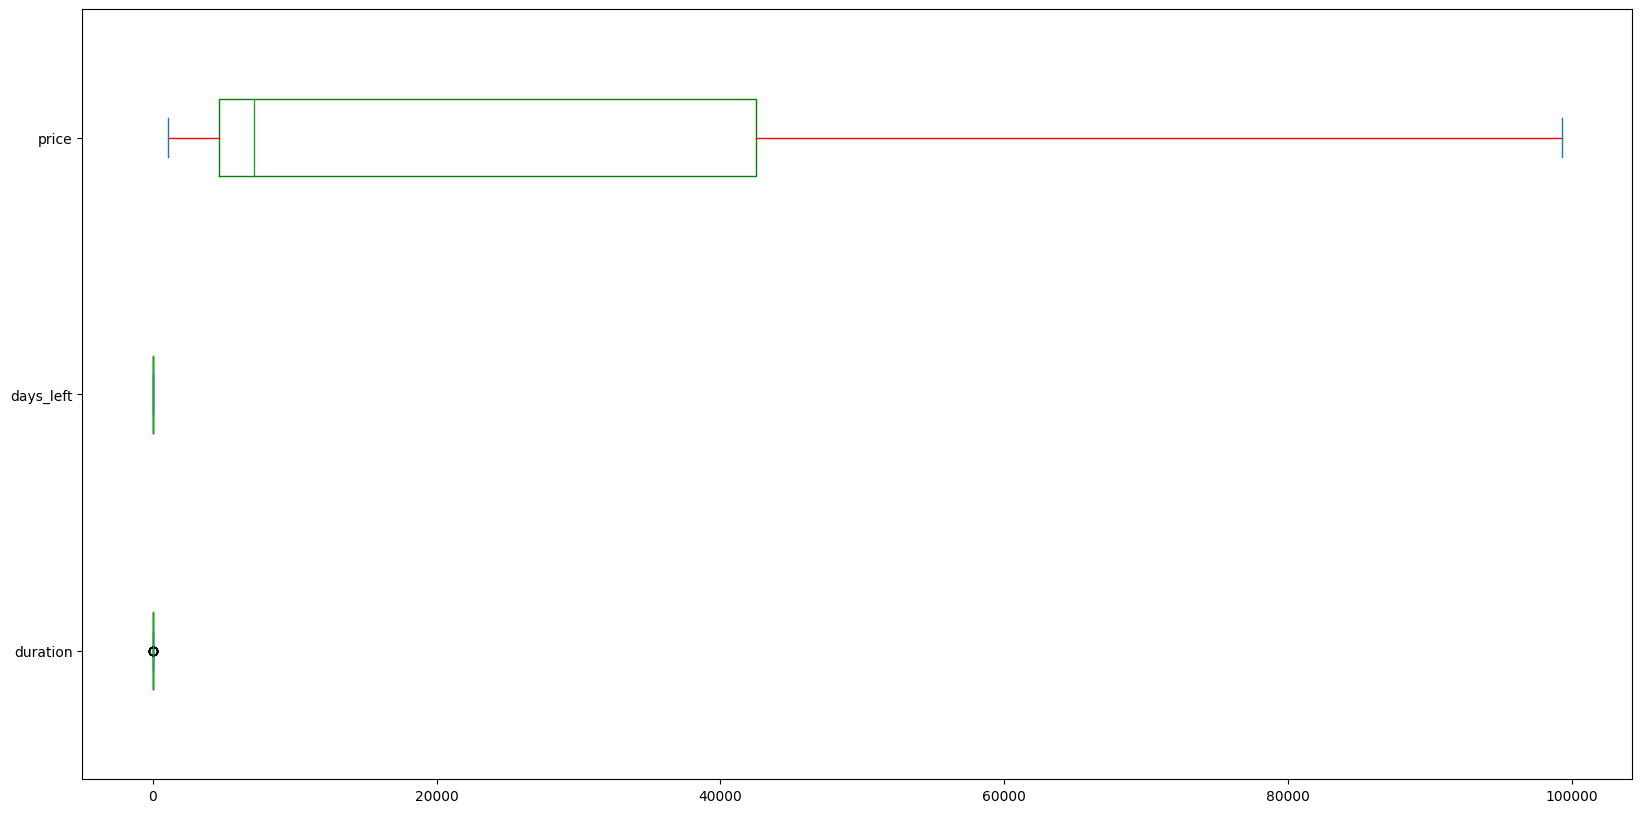

In [20]:
df.plot(kind='box',figsize=(20,10),color={'boxes':'g',"whiskers":'r'},vert=False)

In [22]:
def outlier(df):
    a="price"
    print(df[a].describe().values)
    iqr=df[a].describe().values[6]-df[a].describe().values[4]
    print(iqr)
    lowerfence=df[a].describe().values[4]-(1.5*iqr)
    upperfence=df[a].describe().values[6]+(1.5*iqr)
    print(lowerfence)
    print(upperfence)
    for i in range(1,2000):
        if df[a].iloc[i]<lowerfence:
            df[a].iloc[i]=lowerfence
        if df[a].iloc[i]>upperfence:
            df[a].iloc[i]=upperfence
outlier(df)

[ 2000.         20766.66575    22945.23210105  1105.
  4675.5         7150.         42521.         99289.25      ]
37845.5
-52092.75
99289.25


In [88]:
df=pd.concat([categorical_data, df[numerical_data]], axis=1)

In [142]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='price')
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor

LinearRegression()

In [166]:
regressor.fit(train_categorical_data,y_train)

LinearRegression()

In [167]:
train_pred=regressor.predict(train_categorical_data)
test_pred=regressor.predict(test_categorical_data)

In [168]:
from sklearn.metrics import r2_score
train_model_score = r2_score(y_train, train_pred)
test_model_score = r2_score(y_test,test_pred)
print(train_model_score)
print(test_model_score)

0.932871518904053
0.9304119329445851


In [7]:
from sklearn.tree import DecisionTreeRegressor
models ={"Decision Tree": DecisionTreeRegressor(),
        "Linear Regression": LinearRegression()}
params={"Decision Tree": {
                    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    'splitter':['best','random'],
                    'max_features':['sqrt','log2']},
                
        "Linear Regression":{}}

In [8]:
report={}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    train_model_score = r2_score(y_train, train_pred)
    test_model_score = r2_score(y_test,test_pred)
    print(train_model_score)
    print(test_model_score)
    report[list(models.keys())[i]] = test_model_score
print(report)

NameError: name 'x_train' is not defined

In [1]:
s=list(report.keys())[list(report.values()).index(max(report.values()))]

NameError: name 'report' is not defined

In [124]:
models[s]

DecisionTreeRegressor()

In [121]:
params[s]

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_features': ['sqrt', 'log2']}

In [125]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(models[s],params[s],cv=3)
gs.fit(x_train,y_train)

models[s].set_params(**gs.best_params_)
models[s].fit(x_train,y_train)

train_pred=models[s].predict(x_train)
test_pred=models[s].predict(x_test)
train_model_score = r2_score(y_train, train_pred)
test_model_score = r2_score(y_test,test_pred)
print(train_model_score)
print(test_model_score)


0.9999640365552764
0.9694417782683515
